# importing libraries

In [109]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.svm import SVC as svc 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import StratifiedKFold
import random
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

In [116]:
data=pd.read_csv('letter-recognition.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [117]:
data.columns=['letter','x-box','y-box','width','height','onpix','xmean','ymean','x2mean','y2mean','xybar','x2ybar','xy2bar','x-ege','xegvy','y-ege','yegvx']
data

,letter,x-box,y-box,width,height,onpix,xmean,ymean,x2mean,y2mean,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [118]:
data.value_counts('letter')

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
Q    783
N    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
dtype: int64

In [119]:
ss = StandardScaler()

data.iloc[:,1:]=ss.fit_transform(data.iloc[:,1:])
data

,letter,x-box,y-box,width,height,onpix,xmean,ymean,x2mean,y2mean,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
0,T,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,I,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,D,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,N,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,G,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,-1.057698,-1.523844,-1.053277,-1.049137,-0.687476,0.050543,-0.215220,0.878329,0.344994,-0.917071,-0.172558,-1.888428,-0.448492,-0.219082,-0.269477,-0.495354
19996,C,1.555774,0.897117,1.428701,1.161947,0.225598,-1.430218,0.214833,0.507945,1.605094,1.494105,0.967691,2.437316,-0.448492,0.427463,-0.269477,-0.495354
19997,T,1.033079,0.594497,0.435910,0.719730,0.682135,-0.443044,1.504991,-0.603207,0.765028,1.092242,0.967691,-1.407789,-0.448492,2.367097,-0.659036,-2.350149
19998,S,-1.057698,-1.221224,-0.556881,-1.491354,-1.144013,0.544130,-0.215220,-0.973591,0.344994,0.690380,-0.172558,0.034125,-0.877220,0.427463,0.509640,0.122911


In [120]:
samples=[]
for i in range(10):
    df=data.sample(n=1000)
    df.reset_index(inplace = True)
    samples.append(df)

In [121]:
acc=[]
kernel=[]
nu=[]
epsilon=[]

In [125]:
def fitness(k,n,e,df):
    x=df.iloc[:,2:]
    y=df['letter']
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3 ,random_state=8)
    model = svc(kernel=k,C=n,gamma=e)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    a = accuracy_score(ytest,ypred)
    return a

In [126]:
for i in range(10):
    df=samples[i]
    best_accuracy=0
    best_kernel=0
    best_nu=0
    best_epsilon=0
    iteration=1000
    kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
    for i in range(iteration):
        k=random.choice(kernel_list)
        n=random.uniform(0, 1)
        e=random.uniform(0, 1)
        accuracy=fitness(k,n,e,df)
        if(accuracy>best_accuracy):
            best_kernel=k
            best_nu=n
            best_epsilon=e
            best_accuracy=accuracy
    acc.append(best_accuracy)
    kernel.append(best_kernel)
    nu.append(best_nu)
    epsilon.append(best_epsilon)

In [127]:
Sample=['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10']

In [128]:
dict={'Sample':Sample,"Best accuracy":acc,'Best kernel':kernel,'Best nu':nu,'Best epsilon':epsilon}
table=pd.DataFrame(dict)

In [129]:
table

,Sample,Best accuracy,Best kernel,Best nu,Best epsilon
0,S1,0.763333,linear,0.299513,0.166927
1,S2,0.716667,linear,0.749147,0.212179
2,S3,0.823333,linear,0.426762,0.182637
3,S4,0.733333,linear,0.943721,0.952386
4,S5,0.783333,rbf,0.968909,0.162449
5,S6,0.756667,rbf,0.945023,0.151589
6,S7,0.786667,linear,0.460607,0.706163
7,S8,0.736667,linear,0.712533,0.524026
8,S9,0.756667,linear,0.496265,0.216261
9,S10,0.713333,linear,0.539407,0.954908


In [132]:
df=samples[9]
df

,index,letter,x-box,y-box,width,height,onpix,xmean,ymean,x2mean,y2mean,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
0,10887,X,-1.057698,-1.221224,-0.556881,-1.933571,-1.144013,-0.936631,0.644886,-0.973591,1.185061,0.690380,0.967691,0.034125,-0.448492,-0.219082,-0.269477,-1.113619
1,6521,R,1.033079,0.291877,1.925096,0.719730,2.508283,1.037718,-0.645273,-0.232823,-0.495072,-0.113345,-0.552641,-0.446513,1.695147,0.427463,1.288757,-1.113619
2,15670,Z,-0.012309,1.199738,0.435910,1.161947,1.595209,0.544130,-0.215220,-0.973591,1.185061,-0.515208,-0.172558,-0.446513,-0.877220,-0.865626,2.846991,-0.495354
3,16106,S,-0.012309,1.199738,-0.556881,1.161947,0.225598,0.544130,-0.645273,0.878329,0.765028,-0.515208,0.587608,0.514764,-0.448492,1.074008,2.457433,-0.495354
4,10717,U,0.510385,0.897117,1.428701,1.161947,2.964820,0.544130,-1.075326,-0.232823,-0.075039,-0.917071,0.207525,-0.927151,2.981330,-1.512171,0.899198,-1.731884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5732,C,-0.535004,0.291877,-0.556881,0.277513,-0.687476,-0.936631,-0.215220,0.507945,1.185061,-0.113345,-0.172558,1.956678,-0.877220,0.427463,0.120081,0.741176
996,19085,L,-0.012309,-0.313363,-0.060486,-0.164704,0.225598,0.544130,-1.075326,0.137561,0.344994,-0.917071,0.207525,0.034125,-0.019764,-0.219082,0.899198,0.741176
997,14201,Q,-0.535004,-0.615983,-0.060486,0.277513,0.682135,1.531305,1.504991,0.507945,-0.915106,-2.122658,0.587608,1.956678,-0.019764,1.074008,0.509640,1.359441
998,9288,L,2.078468,1.804978,1.428701,0.719730,0.682135,0.544130,-1.505378,-0.603207,-0.075039,1.092242,-0.172558,1.476040,-0.019764,-0.865626,1.288757,0.122911


In [131]:
df=samples[9]
x=df.iloc[:,2:]
y=df['letter']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3 ,random_state=8)
train_sizes, train_scores, test_scores = learning_curve(svc(kernel=table['Best kernel'].iloc[table['Best accuracy'].idxmax()], 
                                                        C=table['Best nu'].iloc[table['Best accuracy'].idxmax()],
                                                        gamma=table['Best epsilon'].iloc[table['Best accuracy'].idxmax()],
                                                        max_iter = 1000), xtrain, ytrain, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

/Users/kartikmadan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/kartikmadan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/kartikmadan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/kartikmadan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/kartikmadan/opt/anaconda3/lib/python3.9/site-

In [133]:
train_sizes

array([  6,  19,  31,  44,  57,  69,  82,  95, 108, 120, 133, 146, 159,
       171, 184, 197, 209, 222, 235, 248, 260, 273, 286, 299, 311, 324,
       337, 349, 362, 375, 388, 400, 413, 426, 439, 451, 464, 477, 489,
       502, 515, 528, 540, 553, 566, 579, 591, 604, 617, 630])

In [134]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

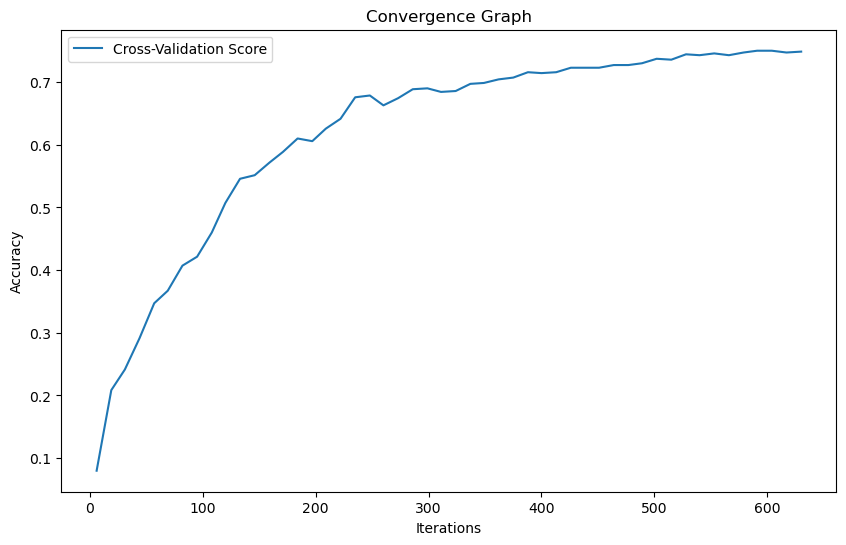

In [136]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, test_mean)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()